In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftn, fftshift

# 1) Reading the fits file
v='Doppler_velocity_HMI_2016.09.06_12-00-00_TAI.fits' #open fits file
hdul = fits.open(v)
hdul.info()

Filename: Doppler_velocity_HMI_2016.09.06_12-00-00_TAI.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   (512, 512, 640)   float32   


In [3]:
# Access the data (assuming the data is in the primary HDU)
v1 = hdul[0].data  # This will be a NumPy array of shape (512, 512, 640)
header0 = hdul[0].header
print (repr(header0))

SIMPLE  =                    T / Written by IDL:  Sun Sep 11 23:15:32 2016      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                  512 /                                                
NAXIS2  =                  512 /                                                
NAXIS3  =                  640 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2016-09-12'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    


An empty NumPy array "dv" is created, which will store the differences between successive frames.

In [19]:
# 2 runnig image differences

import numpy as np

# Create an empty array filled with zeros to store differences # it can store 638 frames, each of size 512x512 pixels.
dv = np.zeros((638, 512, 512))

# Calculate the running difference
for i in range(638):
    dv[i, :, :] = v1[i+2, :, :] - v1[i+1, :, :]

# check the shape of V #dv.shape = (height, width, time)
print(v1.shape)

(640, 512, 512)


dv[200, 200, :], are extracting the time series of velocity changes at pixel (200, 200) for all 638 frames. 

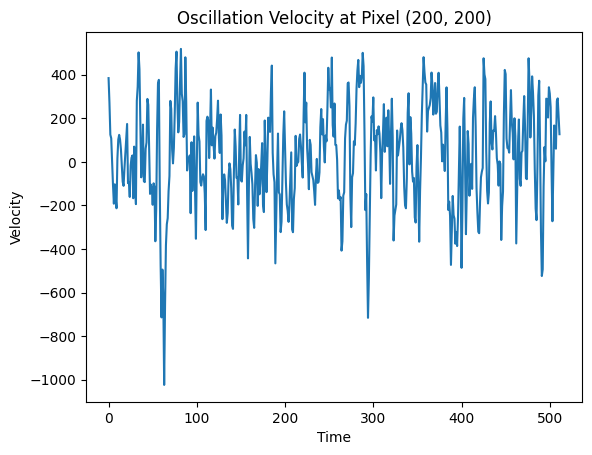

In [20]:
# 3 Plotting oscillations velocity for one pixel

import matplotlib.pyplot as plt

# Plot the time evolution for pixel (200, 200)
plt.plot(dv[200, 200, :])
plt.title('Oscillation Velocity at Pixel (200, 200)')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.show()

The 3D power spectrum is used to analyze solar oscillations in terms of spatial (horizontal wavevector) and temporal frequencies. 
It visualizes how oscillation power(intensity) is distributed in the Sun's interior.

•	  Spatial frequency represents kₓ, kᵧ : Horizontal wave numbers representing spatial variations.

•	  Temporal frequency represents ω : Angular frequency representing temporal variations.


The power spectrum is a plot showing how much oscillation power exists at different frequencies and wave numbers.

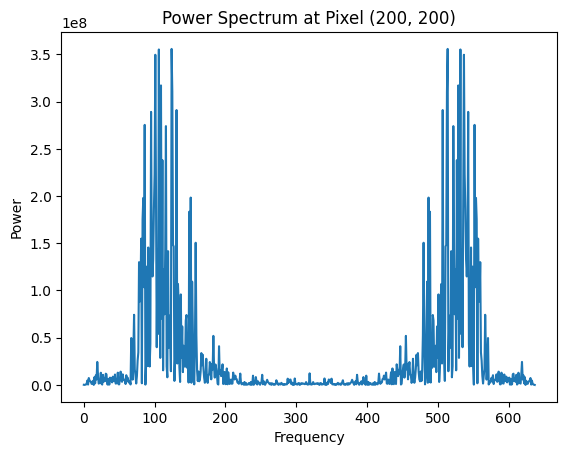

In [ ]:
# 4 Power Spectrum for One Pixel

from scipy.fft import fft

# Perform FFT along the time axis for pixel (200, 200)
pixel_fft = fft(dv[:, 200, 200])

# Calculate power spectrum (squared magnitude of FFT)
power_spectrum = np.abs(pixel_fft) ** 2

# Plot the power spectrum
plt.plot(power_spectrum)
plt.title('Power Spectrum at Pixel (200, 200)')
plt.xlabel('Frequency')
plt.ylabel('Power (m/s) * 2')
plt.show()

Peaks are showing the strongest oscillations, indicating the presence of p-modes or f-modes.

•	p-modes (pressure modes): Sound waves driven by pressure forces inside the Sun.

•	f-modes (fundamental modes): Surface waves driven by gravity.



"fft()" function performs a Fourier transform on the time series of Doppler velocity values for that pixel. "fftn()" function performs a 3D Fast Fourier Transform on the entire data cube dv.

Ring diagrams are 2D slices of the 3D power spectrum at fixed temporal frequencies, resembling concentric rings in wave-number space. These rings show how the waves are spread out in terms of size (spatial frequency) and speed (temporal frequency) on Sun's surface. •	Shifts in the ring patterns reveal information about subsurface flows. 

Flow velocities cause shifts in the ring positions. 

If the rings are perfectly centered, it means there’s no flow under the surface of the Sun. And if the rings shift:

•	Towards the center (blue shift)(Doppler effect).

•	Away from the center(red shift).

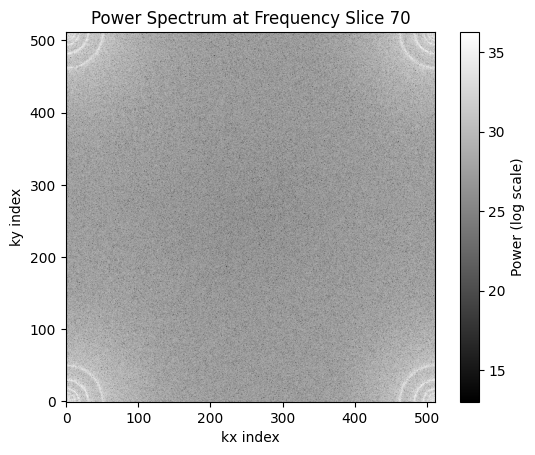

In [22]:
# 5

from scipy.fft import fftn

# Perform 3D FFT of the entire data cube
a = fftn(dv) 
# Calculate the power spectrum for the 3D FFT
p = np.abs(a) ** 2  

# Take the logarithm of the power spectrum for better visualization (add small value to avoid log(0))
pa = np.log(p + 1e-10)  

# Visualize the power spectrum at a specific frequency slice (e.g., index 70)
frequency_index = 70
plt.figure()
plt.imshow(pa[frequency_index, :, :], cmap='gray', origin='lower')
plt.title(f'Power Spectrum at Frequency Slice {frequency_index}')
plt.colorbar(label='Power (log scale)')
plt.xlabel('kx index')
plt.ylabel('ky index')
plt.show()

The Fourier Transform typically places the low-frequency components at the edges of the image. Shifting these components to the center can make it easier to interpret the spectrum, especially when analyzing oscillatory patterns.

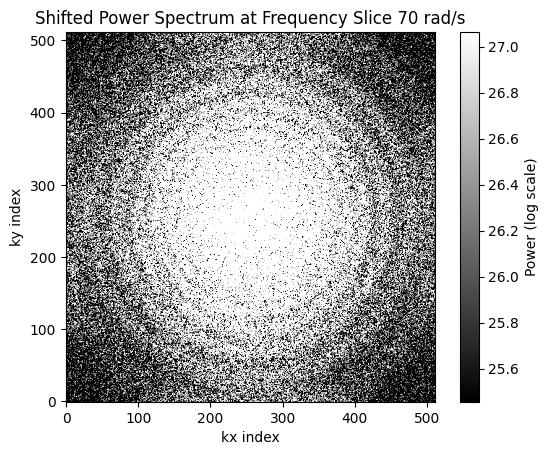

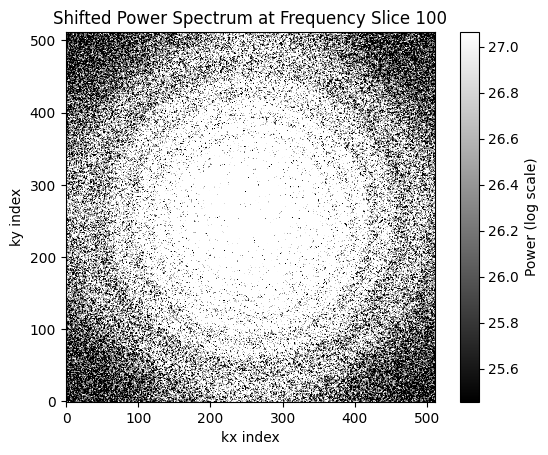

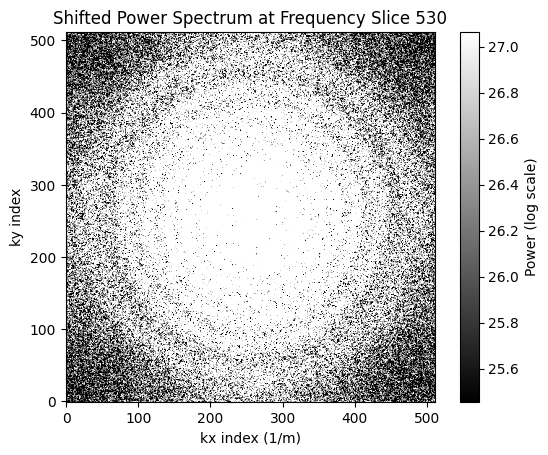

In [23]:
# Shift to center kx=ky=0 for better visualization
p_shifted = fftshift(p)
pa_shifted = np.log(p_shifted + 1e-10)

# Set display range for better contrast (adjust these values as needed)
vmin = np.percentile(pa_shifted, 15)  # Set lower percentile for vmin
vmax = np.percentile(pa_shifted, 45)  # Set upper percentile for vmax

# Visualize the shifted power spectrum with adjusted brightness
plt.figure()
plt.imshow(pa_shifted[frequency_index, :, :], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.title(f'Shifted Power Spectrum at Frequency Slice {frequency_index} rad/s')
plt.colorbar(label='Power (log scale)')
plt.xlabel('kx index')
plt.ylabel('ky index')
plt.show()

frequency_100 = 100

# Visualize the shifted power spectrum with adjusted brightness
plt.figure()
plt.imshow(pa_shifted[frequency_100, :, :], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.title(f'Shifted Power Spectrum at Frequency Slice {frequency_100}')
plt.colorbar(label='Power (log scale)')
plt.xlabel('kx index')
plt.ylabel('ky index')
plt.show()

frequency_530 = 530

# Visualize the shifted power spectrum with adjusted brightness
plt.figure()
plt.imshow(pa_shifted[frequency_530, :, :], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.title(f'Shifted Power Spectrum at Frequency Slice {frequency_530}')
plt.colorbar(label='Power (log scale)')
plt.xlabel('kx index (1/m)')
plt.ylabel('ky index (1/m)')
plt.show()

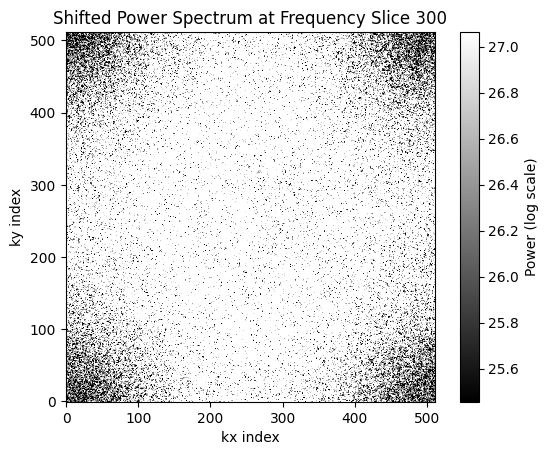

In [24]:
# Visualize the power spectrum at a specific frequency slice (e.g., index 30)
frequency_300 = 300

# Visualize the shifted power spectrum with adjusted brightness
plt.figure()
plt.imshow(pa_shifted[frequency_300, :, :], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.title(f'Shifted Power Spectrum at Frequency Slice {frequency_300}')
plt.colorbar(label='Power (log scale)')
plt.xlabel('kx index')
plt.ylabel('ky index')
plt.show()